# Test Submission

Quick test for submission.

In [22]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import os
import random
from PIL import Image

In [23]:
def get_image_with_class_value(image, value):
    return np.where(image == value, 1, 0).astype("uint8") * 255

In [24]:
TYPE = "localization"
# TYPE = "damage"

In [31]:
# get the original image name
if TYPE == "localization":
    image_names = [os.path.basename(path) for path in glob.glob("./SUBMISSION_LOCALIZATION/*{}*".format(TYPE))]
    image_name = image_names[random.randint(0, len(image_names) - 1)]
    original_image_name = image_name.replace("localization", "pre").replace("_prediction", "")
    pred_image = cv2.imread("./SUBMISSION_LOCALIZATION/{}".format(image_name))
    orig_image = cv2.imread("./data/test/images/{}".format(original_image_name))
    assert np.array(Image.open("./SUBMISSION_LOCALIZATION/{}".format(image_name))).shape == (1024, 1024)
    assert np.array(Image.open("./data/test/images/{}".format(original_image_name))).shape == (1024, 1024, 3)
elif TYPE == "damage":
    image_names = [os.path.basename(path) for path in glob.glob("./SUBMISSION_DAMAGE/*{}*".format(TYPE))]
    image_name = image_names[random.randint(0, len(image_names) - 1)]
    original_image_name = image_name.replace("damage", "post").replace("_prediction", "")
    pred_image = cv2.imread("./SUBMISSION_DAMAGE/{}".format(image_name))
    orig_image = cv2.imread("./data/test/images/{}".format(original_image_name))
    assert np.array(Image.open("./SUBMISSION_DAMAGE/{}".format(image_name))).shape == (1024, 1024)
    assert np.array(Image.open("./data/test/images/{}".format(original_image_name))).shape == (1024, 1024, 3)
print("image_name: {}".format(image_name))
print("original_image_name: {}".format(original_image_name))

image_name: test_localization_00265_prediction.png
original_image_name: test_pre_00265.png


Pred, original


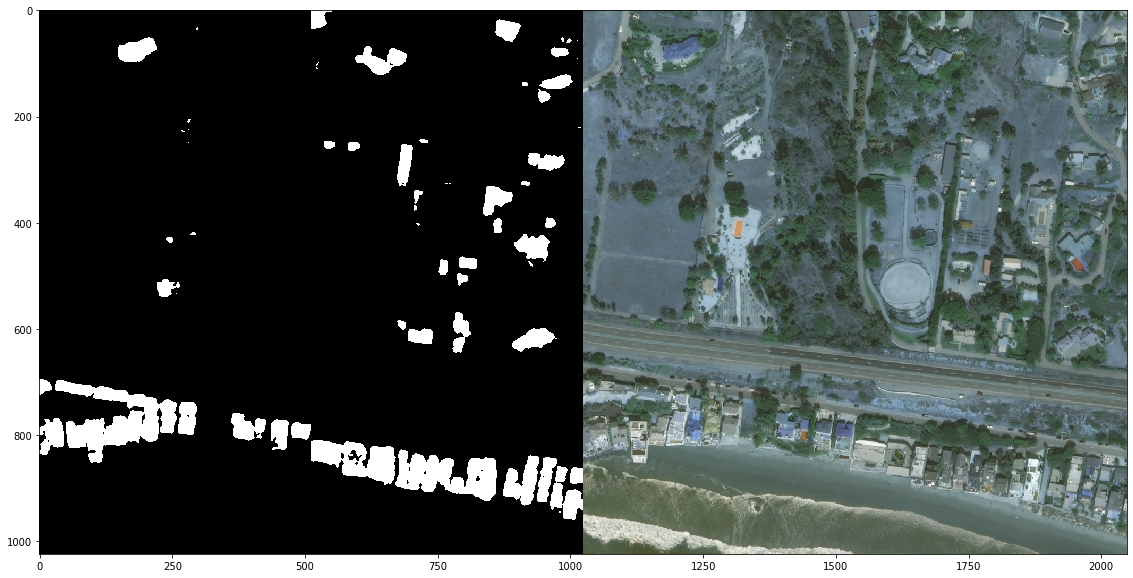

In [32]:
if TYPE == "localization":
    image = np.hstack([get_image_with_class_value(pred_image, 1), orig_image])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    print("Pred, original")
elif TYPE == "damage":
    image = np.hstack([
        get_image_with_class_value(pred_image, 1),
        get_image_with_class_value(pred_image, 2),
        get_image_with_class_value(pred_image, 3),
        get_image_with_class_value(pred_image, 4),
        orig_image])
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    print("Pred, original")